# Coding Exercises

## Financial Data Analysis

### Exercise 2: Financial Time Series

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

In [145]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

df = pd.read_csv("us_stocks.csv", header = [0,1], index_col=[0], parse_dates=[0])
stocks = df.loc["31-12-2015" : "31-12-2018"]
stocks.columns = stocks.columns.to_flat_index()
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)
stocks.swaplevel(axis=1).sort_index(axis = 1)
stocks.loc["2017-01","Close"].head()

#The adjusted close price of FB on Jan 07, 2016
#stocks["Adj Close"]["FB"].loc["2016-01-07"]

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2017-01-03,75.349998,116.860001,36.599998,119.620003,84.199997,68.660004
2017-01-04,76.260002,118.690002,36.410000,119.480003,84.500000,69.059998
2017-01-05,75.320000,120.669998,36.349998,119.699997,85.059998,69.209999
2017-01-06,75.470001,123.410004,36.480000,120.760002,85.029999,68.260002
2017-01-09,75.860001,124.900002,36.610001,120.430000,84.400002,68.709999


Import the us stocks dataset (__us_stocks.csv__) and select the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__ and work through the next questions with this DataFrame!

In [133]:
close = stocks.loc[:,"Close"]
close.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,69.550003,104.660004,34.450001,118.139999,79.410004,61.299999
2016-01-04,67.589996,102.220001,33.990002,117.580002,78.370003,61.459999
2016-01-05,66.550003,102.730003,33.830002,119.199997,78.620003,62.919998
2016-01-06,64.419998,102.970001,33.080002,118.400002,77.860001,63.549999
2016-01-07,63.840000,97.919998,31.840000,115.660004,77.180000,65.029999


-__Visualize__ the Adjusted Close of the six stocks __over time__!

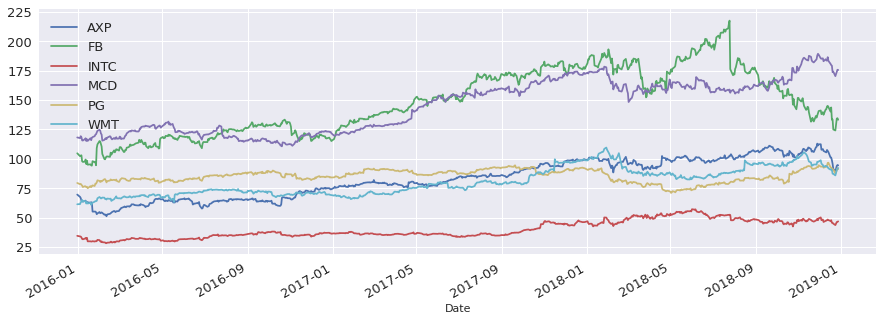

In [11]:
close.plot(figsize=(15,5), fontsize= 13)
plt.legend(fontsize = 13)
plt.show()

- Note: Because the stock prices __are not normalized to a common starting value__, returns here are misleading!

- __Visualize__ the __normalized__ Adjusted Close of the six stocks __over time__, each starting at a __Base Value of 100__!

In [134]:
norm = close.div(close.iloc[0]).mul(100) #normalizing each stock to its own starting value in the dataset
norm.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-01-04,97.181874,97.668639,98.664734,99.525989,98.690340,100.261011
2016-01-05,95.686557,98.155933,98.200293,100.897239,99.005162,102.642739
2016-01-06,92.624005,98.385245,96.023225,100.220080,98.048101,103.670473
2016-01-07,91.790075,93.560094,92.423800,97.900800,97.191785,106.084829


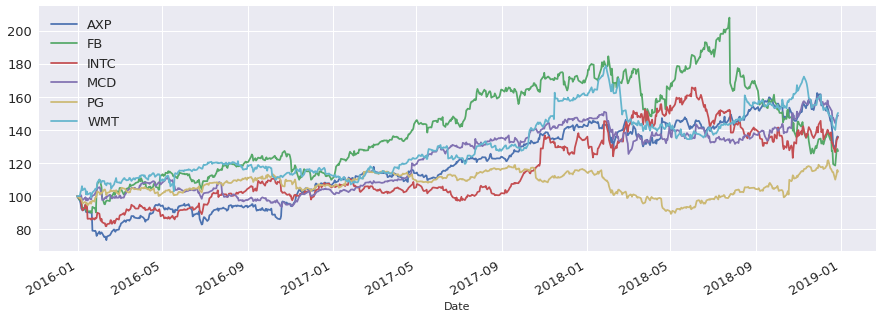

In [117]:
norm.plot(figsize=(15,5), fontsize= 13)
plt.legend(fontsize = 13)
plt.show()

- Notice how each stock starts at 100!

- Calculate __monthly returns__ for all six stocks and create a new __returns__ DataFrame!

In [131]:
returns = norm.pct_change(axis=0).dropna()
returns = returns.resample("BM").last()
returns.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2016-01-29,0.011725,0.028412,0.035035,0.011440,0.023428,0.033323
2016-02-29,0.003611,-0.009266,-0.007047,0.001111,-0.009988,-0.002556
2016-03-31,0.018411,-0.005231,-0.011006,-0.001192,-0.004475,-0.004506
2016-04-29,-0.006227,0.007282,-0.026680,-0.011179,0.004514,-0.029604
2016-05-31,0.003663,-0.004775,0.000634,-0.009655,-0.004789,0.000424


In [130]:
returns = norm.pct_change(axis=0).dropna().copy()
returns = returns.resample("BM").last()
#returns.plot(kind="hist", figsize=(15,8), bins=50)
returns.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2016-01-29,0.011725,0.028412,0.035035,0.011440,0.023428,0.033323
2016-02-29,0.003611,-0.009266,-0.007047,0.001111,-0.009988,-0.002556
2016-03-31,0.018411,-0.005231,-0.011006,-0.001192,-0.004475,-0.004506
2016-04-29,-0.006227,0.007282,-0.026680,-0.011179,0.004514,-0.029604
2016-05-31,0.003663,-0.004775,0.000634,-0.009655,-0.004789,0.000424


- Calculate the __annualized mean return__ and the __annualized standard deviation__ of returns for all six stocks!

In [123]:
summary=returns.describe().T.loc[:,['mean', 'std']]
summary['mean'] = summary["mean"]*252
summary['std'] = summary["std"]*np.sqrt(252)
summary

,mean,std
AXP,0.330860,0.146104
FB,0.206961,0.245566
INTC,0.693885,0.293338
MCD,-0.217179,0.196618
PG,0.132166,0.155834
WMT,-0.321161,0.183696


- __Visualize risk/return__ of all six stocks in a (total) risk / return framework. (annualized std on the x-axis, annualized mean returns on the y-axis). <br>
Identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)

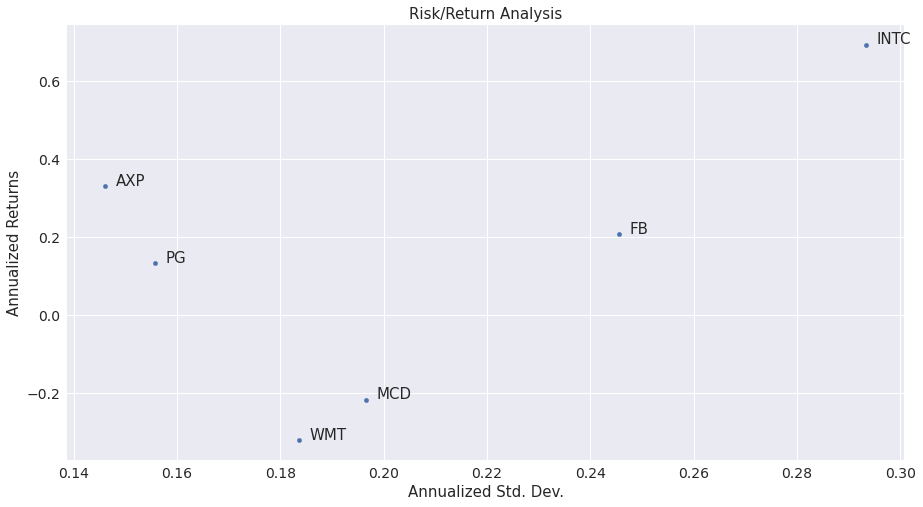

In [128]:
summary.plot.scatter(x = 'std', y = 'mean', fontsize=14, figsize=(15,8))
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i,"std"]+0.002, summary.loc[i,"mean"]+0.002), size=15)
plt.xlabel("Annualized Std. Dev.", fontsize = 15)
plt.ylabel("Annualized Returns", fontsize = 15)
plt.title("Risk/Return Analysis", fontsize = 15)
plt.show()

- __Visualize__ the __correlation matrix__ of monthly returns with a __Seaborn Heatmap__. Which stocks-pair shows the __highest (positive) correlation__ of monthly returns?

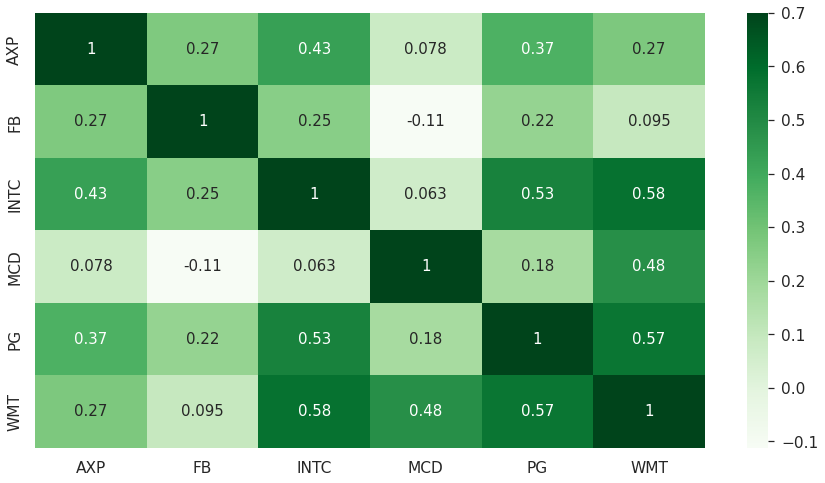

In [160]:
#returns.cov() #covariance
#returns.corr() #correlation

plt.figure(figsize=(15,8))
sns.set(font_scale=1.4)
sns.heatmap(returns.corr(), cmap='Greens',annot=True, annot_kws={'size':15}, vmax=0.7)
plt.show()

__Ticker Symbols__:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

------------------------

## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [9]:
#run the cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

1. __Import__ daily stock price data (__us_stocks.csv__) and __inspect__! Handle the __MultiIndex__! __Fill in the gaps__!

In [10]:
stocks = pd.read_csv("us_stocks.csv", header = ---, index_col= ---, parse_dates= ---)

SyntaxError: invalid syntax (4109046448.py, line 1)

In [ ]:
# run the cell!
stocks.head()

Ticker Symbols:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

2. __Select__ the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.)! __Overwrite__ stocks! <br>
__How many Timestamps__ / Days are in the DataFrame now?

In [ ]:
# run the cell!
stocks.head()

In [ ]:
# run the cell!
stocks.info()

We have ... 754 Days.

3. __Plot__ stocks (figsize (12, 8)!

4. __Bring__ the six stocks to the __same Base Value__ (100) and __plot__ again! __Fill in the gaps!__

In [ ]:
stocks.---(stocks.iloc[0]).---(figsize = (12,8))
plt.show()

Still hard to compare performance, right?

5. __Resample__ stocks to __monthly__ frequency (__last__ trading price of each month, index should show last calender day)!<br> __Save__ the resampled Dataframe in the variable __stocks_m__!

In [ ]:
# run the cell!
stocks_m.head()

6. Calculate __monthly returns__ and __save__ the result in the variable __ret__! (drop NaN Values!)

In [ ]:
#run the cell!
ret

7. Calculate __mean__ and  __standard deviation__ of monthly returns! __Save__ the result in the variable __summary__!<br>
__Fill in the gaps!__

In [ ]:
summary = ret.describe().T.loc[:, [---, ---]]

In [ ]:
#run the cell!
summary

8. __Annualize__ mean and standard deviation of returns! __Fill in the gaps!__

In [ ]:
summary["mean"] = summary["mean"]*---
summary["std"] = summary["std"]*---(---)

In [ ]:
#run the cell!
summary

9. __Plot__ and __compare__ the performance of the six stocks in a __(total) risk / return__ framework! __Fill in the gaps__! <br>
Can you identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)?

In [ ]:
summary.plot(kind = "---", x = "---", y = "---", figsize = (12, 8), s = 50, fontsize = 15, xlim = (0.1, 0.3), ylim = (0, 0.25))
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In a (total) risk / return framework, McDonalds (most likely) showed the best performance (upper left) and facebook the worst performance (lower right)!

10. Prepare the __correlation matrix__ of monthly returns. Which stocks-pair shows the __highest (positive) correlation__ of monthly returns? 

The highest positive correlation of returns is between ... Walmart and McDonalds.

11. __Visualize__ the correlation matrix with a __Seaborn Heatmap__! __Fill in the gaps!__

In [ ]:
# run the cell!
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.0)
sns.---(---, cmap = "RdYlGn", annot = True, vmin = -0.5, vmax = 0.6, center = 0)
plt.show()

# Solutions (Stop here if you want to code on your own!)

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
#run the cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

1. __Import__ daily stock price data (__us_stocks.csv__) and __inspect__! Handle the __MultiIndex__! __Fill in the gaps__!

In [ ]:
stocks = pd.read_csv("us_stocks.csv", header = [0,1], index_col= [0], parse_dates= [0])

In [ ]:
# run the cell!
stocks.head()

Ticker Symbols:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

2. __Select__ the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.)! __Overwrite__ stocks! <br>
__How many Timestamps__ / Days are in the DataFrame now?

In [ ]:
stocks = stocks.loc["31-12-2015":"31-12-2018", "Adj Close"]

In [ ]:
# run the cell!
stocks.head()

In [ ]:
# run the cell!
stocks.info()

We have ... 754 Days.

3. __Plot__ stocks (figsize (12, 8)!

In [ ]:
stocks.plot(figsize = (12,8))
plt.show()

4. __Bring__ the six stocks to the __same Base Value__ (100) and __plot__ again! __Fill in the gaps!__

In [ ]:
stocks.div(stocks.iloc[0]).mul(100).plot(figsize = (12,8))
plt.show()

Still hard to compare performance, right?

5. __Resample__ stocks to __monthly__ frequency (__last__ trading price of each month, index should show last calender day)!<br> __Save__ the resampled Dataframe in the variable __stocks_m__!

In [ ]:
stocks_m = stocks.resample("M").last()

In [ ]:
# run the cell!
stocks_m.head()

6. Calculate __monthly returns__ and __save__ the result in the variable __ret__! (drop NaN Values!)

In [ ]:
ret = stocks_m.pct_change().dropna()

In [ ]:
#run the cell!
ret

7. Calculate __mean__ and  __standard deviation__ of monthly returns! __Save__ the result in the variable __summary__!<br>
__Fill in the gaps!__

In [ ]:
summary = ret.describe().T.loc[:, ["mean", "std"]]

In [ ]:
#run the cell!
summary

8. __Annualize__ mean and standard deviation of returns! __Fill in the gaps!__

In [ ]:
summary["mean"] = summary["mean"]*12
summary["std"] = summary["std"]*np.sqrt(12)

In [ ]:
#run the cell!
summary

9. __Plot__ and __compare__ the performance of the six stocks in a __(total) risk / return__ framework! __Fill in the gaps__! <br>
Can you identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)?

In [ ]:
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (12, 8), s = 50, fontsize = 15, xlim = (0.1, 0.3), ylim = (0, 0.25))
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In a (total) risk / return framework, McDonalds (most likely) showed the best performance (upper left) and facebook the worst performance (lower right)!

10. Prepare the __correlation matrix__ of monthly returns. Which stocks-pair shows the __highest (positive) correlation__ of monthly returns? 

In [ ]:
ret.corr()

The highest positive correlation of returns is between ... Walmart and McDonalds.

11. __Visualize__ the correlation matrix with a __Seaborn Heatmap__! __Fill in the gaps!__

In [ ]:
# run the cell!
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.0)
sns.heatmap(ret.corr(), cmap = "RdYlGn", annot = True, vmin = -0.5, vmax = 0.6, center = 0)
plt.show()

# Well Done!

-------------------